<img src=http://www.wageningenur.nl/upload/f9a0b5f2-15c5-4b84-9e14-20ef02f5e265_wur-logo.png alt="Wageningen-UR", style="float:right">
 
 

# Getting Started with PCSE/WOFOST

This Jupyter notebook will introduce PCSE and get started with WOFOST.

**Prerequisites for running this notebook**

Several packages need to be installed for running PCSE/WOFOST:

  1. PCSE and its dependencies. See the [PCSE user guide](http://pcse.readthedocs.io/en/stable/installing.html) for more information;
  2. The `pandas` module for processing and storing WOFOST output;


# 1. Importing the relevant modules

First the required modules need to be imported. For this *getting started* we only need PCSE, pandas and matplotlib

In [1]:
%matplotlib inline
import pcse
import pandas
import matplotlib.pyplot as plt

# 2. Starting from the internal demo database
For demonstration purposes, we can make a start wofost with a single function call from the internal demo databases.


In [2]:
wofostPP = pcse.start_wofost(mode="pp")

Getting information about variables is easy using the `get_variable()` method.

In [3]:
wofostPP.get_variable("LAI")

0.14468999999999999

Running the model can be done with the `run()` function that forwards the model with one time step

In [4]:
wofostPP.run()
wofostPP.get_variable("LAI")

0.15418401897830203

 Running the model for a single time step only is not conventient, we we can specify the number of time steps as well

In [5]:
wofostPP.run(days=10)
wofostPP.get_variable("LAI")

0.28708094170865844

Or we can let it run until the end of the simulation

In [6]:
wofostPP.run_till_terminate()

# 3. Retrieving and displaying WOFOST output
First retrieve output and convert it to a data frame using pandas

In [7]:
dfPP = pandas.DataFrame(wofostPP.get_output()).set_index("day")

In [8]:
dfPP.head()

,DVS,LAI,RD,SM,TAGP,TRA,TWLV,TWRT,TWSO,TWST,WWLOW
day,,,,,,,,,,,
2000-01-01,0.000000,0.144690,10.0,0.3175,105.000000,0.005768,68.250000,105.000000,0.0,36.750000,None
2000-01-02,0.008867,0.154184,11.2,0.3175,111.889709,0.003312,72.728311,111.889709,0.0,39.161398,None
2000-01-03,0.017157,0.164025,12.4,0.3175,119.031175,0.002589,77.370264,119.031175,0.0,41.660911,None
2000-01-04,0.024293,0.173908,13.6,0.3175,126.203515,0.006309,82.032285,126.203515,0.0,44.171230,None
2000-01-05,0.032706,0.185033,14.8,0.3175,134.276360,0.003616,87.279634,134.276360,0.0,46.996726,None


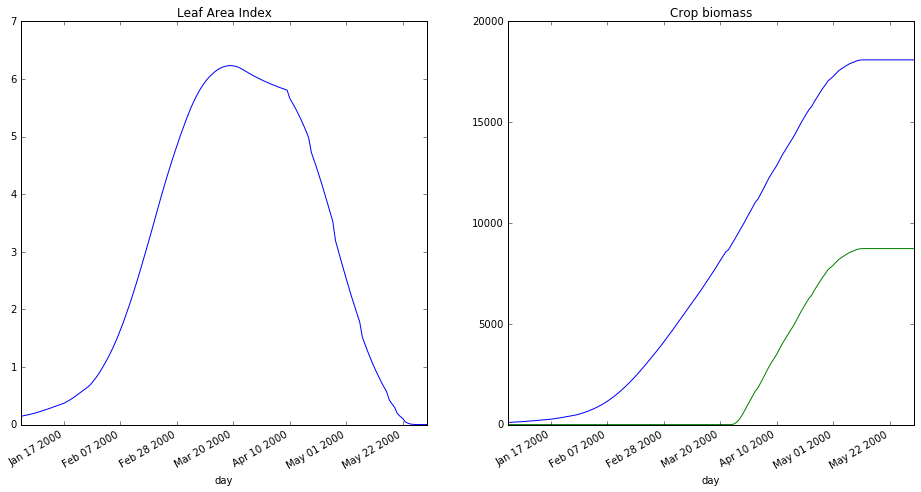

In [9]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
dfPP.LAI.plot(ax=axis1, label="LAI")
dfPP.TAGP.plot(ax=axis2, label="Total biomass")
dfPP.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index")
axis2.set_title("Crop biomass")
fig.autofmt_xdate()

In [10]:
wofostWLP = pcse.start_wofost(mode="wlp")
wofostWLP.run_till_terminate()


In [11]:
dfWLP = pandas.DataFrame(wofostWLP.get_output()).set_index("day")

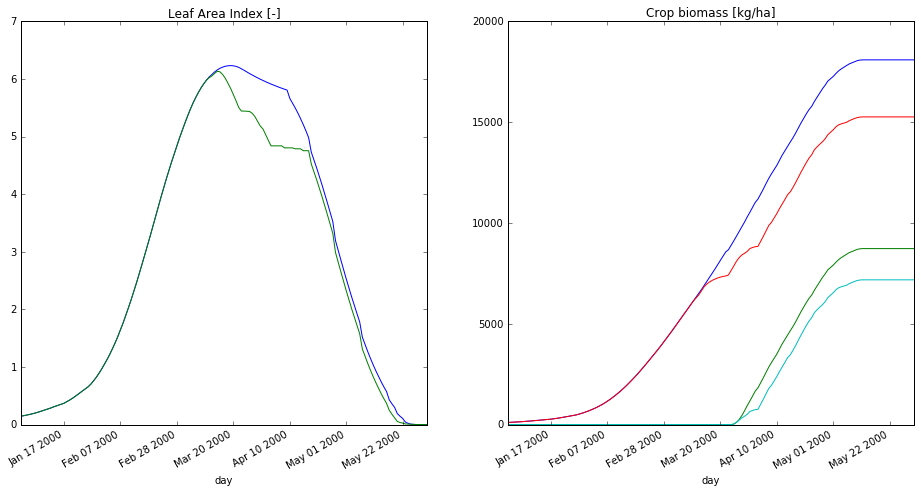

In [12]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
dfPP.LAI.plot(ax=axis1, label="LAI")
dfPP.TAGP.plot(ax=axis2, label="Total biomass")
dfPP.TWSO.plot(ax=axis2, label="Yield")
dfWLP.LAI.plot(ax=axis1, label="LAI")
dfWLP.TAGP.plot(ax=axis2, label="Total biomass")
dfWLP.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index [-]")
axis2.set_title("Crop biomass [kg/ha]")
fig.autofmt_xdate()